# Life Expectancy Regression Analysis

GitHub Project URL: https://github.com/CJTAYL/DTSA_5509

## Introduction

Despite advances in technology and healthcare, several countries grapple with stagnating or declining life expectancy. To address this issue, governmental and non-governmental organizations often implement targeted interventions (e.g., vaccination clinics). However, in situations where there is a finite amount of funding, it is challenging to determine which intervention will produce the largest gain. 

This project endeavors to create a model that can predict average life expectancy for a population based on a set of variables (e.g., infant deaths, average alcohol consumption). Ideally, the model will be used to support leaders in public policy and philanthropy focused on addressing stagnating or declining life expectancy. 

In [127]:
import pandas as pd

# Setting default number of decimal places to 2
pd.set_option('display.float_format', '{:.2f}'.format)

# Entering link to data housed in GitHub repository
url = 'https://raw.githubusercontent.com/CJTAYL/DTSA_5509/main/life_expectancy_WHO.csv'

df = pd.read_csv(url)

The dataset was retrieved from Kaggle and can be accessed using the following URL: https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated/

Data were collected from 2000 to 2015. Each row in the dataframe represents a country's data for a specific year (e.g., 2004). 

## Exploratory Data Analysis

In [128]:
# Checking the number of rows and columns
df_dimensions = df.shape

print(f"The dataframe is comprised of {df_dimensions[0]} rows and {df_dimensions[1]} columns")

The dataframe is comprised of 2864 rows and 21 columns


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

### Description of Variables

The dataframe is comprised of 21 variables. A description for each variable is provided below. 

- Country: Country name
- Region: Region where country is located
- Year: Year data were recorded
- Infant Deaths: Infant deaths per 1000 residents 
- Under Five Deaths: Deaths of children under 5-years-old per 1000 residents
- Adult Mortality: Deaths of adults per 1000 residents
- Alcohol Consumption: Litres of pure alcohol per capita for residents 15-years-old or older
- Hepatitis B: Percent of 1-year-olds who have received immunization for Hepatitis B
- Measles: Percent of 1-year-olds who have received immunization the first immunization for Measles
- BMI: Weight in kilograms divided by the square root of the person's height
- Polio: Percent of 1-year-olds who have received immunization for Polio
- Diphtheria: Percent of 1-year-olds who have received immunization for Diphtheria tetanus toxoid and pertussis
- Incidents HIV: Incidents of human immunodeficiency virus (HIV) per 1000 residents aged 15-49
- GDP per Capita: Gross Domestic Product in current US Dollars per person
- Population: Total population in millions
- Thinness 10-19 years: Residents with BMI less than 2 standard deviations below the median aged 10-19
- Thinness 5-9 years: Residents with BMI less than 2 standard deviations below the median aged 5-9
- Schooling: Averagfe years that people aged 25 years or older spent in formal education
- Economy Status Developed: Scored 1 if country's economy categorized as "Developing"
- Economy Status Developing: Scored 1 if country's economy categorized as "Developed"
- Life Expectancy: Avg. life expectancy from years 2010-2015

In [130]:
# Viewing the first five rows of the dataframe
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.10,13.00,105.82,1.32,97,65,27.80,97,97,0.08,11006,78.53,4.90,4.80,7.80,0,1,76.50
1,Spain,European Union,2015,2.70,3.30,57.90,10.35,97,94,26.00,97,97,0.09,25742,46.44,0.60,0.50,9.70,1,0,82.80
2,India,Asia,2007,51.50,67.90,201.08,1.57,60,35,21.20,67,64,0.13,1076,1183.21,27.10,28.00,5.00,0,1,65.40
3,Guyana,South America,2006,32.80,40.50,222.20,5.68,93,74,25.30,92,93,0.79,4146,0.75,5.70,5.50,7.90,0,1,67.00
4,Israel,Middle East,2012,3.40,4.30,57.95,2.89,97,89,27.00,94,94,0.08,33995,7.91,1.20,1.10,12.80,1,0,81.70


In [131]:
# Viewing the last five rows of the dataframe
df.tail()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
2859,Niger,Africa,2000,97.00,224.90,291.82,0.09,72,64,20.80,41,34,0.49,399,11.33,12.80,12.90,1.10,0,1,49.90
2860,Mongolia,Asia,2009,23.90,28.60,235.23,6.56,97,97,25.30,96,95,0.02,2515,2.67,2.20,2.30,9.10,0,1,66.90
2861,Sri Lanka,Asia,2004,17.70,28.90,134.90,1.56,62,95,21.90,97,97,0.02,2130,19.39,15.40,15.50,10.30,0,1,74.30
2862,Lithuania,European Union,2002,7.90,9.90,204.01,11.00,94,95,26.10,97,95,0.05,7424,3.44,3.30,3.30,11.10,1,0,71.80
2863,Iceland,Rest of Europe,2011,2.10,2.60,50.57,6.84,88,90,26.10,95,95,0.05,48934,0.32,0.90,0.90,11.00,1,0,82.40


In [132]:
# Counting the number of countries included in the dataset 
unique_countries = df['Country'].nunique()

print(f"Number of unique countries in the dataset: {unique_countries}")

Number of unique countries in the dataset: 179


In [133]:
# Calculating the median for life expectancy
df['Life_expectancy'].median()

71.4

In [134]:
# Descriptive statistics for the potential features of the model
df.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00
mean,2007.50,30.36,42.94,192.25,4.82,84.29,77.34,25.03,86.50,86.27,0.89,11540.92,36.68,4.87,4.90,7.63,0.21,0.79,68.86
std,4.61,27.54,44.57,114.91,3.98,16.00,18.66,2.19,15.08,15.53,2.38,16934.79,136.49,4.44,4.53,3.17,0.41,0.41,9.41
min,2000.00,1.80,2.30,49.38,0.00,12.00,10.00,19.80,8.00,16.00,0.01,148.00,0.08,0.10,0.10,1.10,0.00,0.00,39.40
25%,2003.75,8.10,9.67,106.91,1.20,78.00,64.00,23.20,81.00,81.00,0.08,1415.75,2.10,1.60,1.60,5.10,0.00,1.00,62.70
50%,2007.50,19.60,23.10,163.84,4.02,89.00,83.00,25.50,93.00,93.00,0.15,4217.00,7.85,3.30,3.40,7.80,0.00,1.00,71.40
75%,2011.25,47.35,66.00,246.79,7.78,96.00,93.00,26.40,97.00,97.00,0.46,12557.00,23.69,7.20,7.30,10.30,0.00,1.00,75.40
max,2015.00,138.10,224.90,719.36,17.87,99.00,99.00,32.10,99.00,99.00,21.68,112418.00,1379.86,27.70,28.60,14.10,1.00,1.00,83.80


In [135]:
# Checking for missing values 
df.isnull().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

### Description of Potential Features

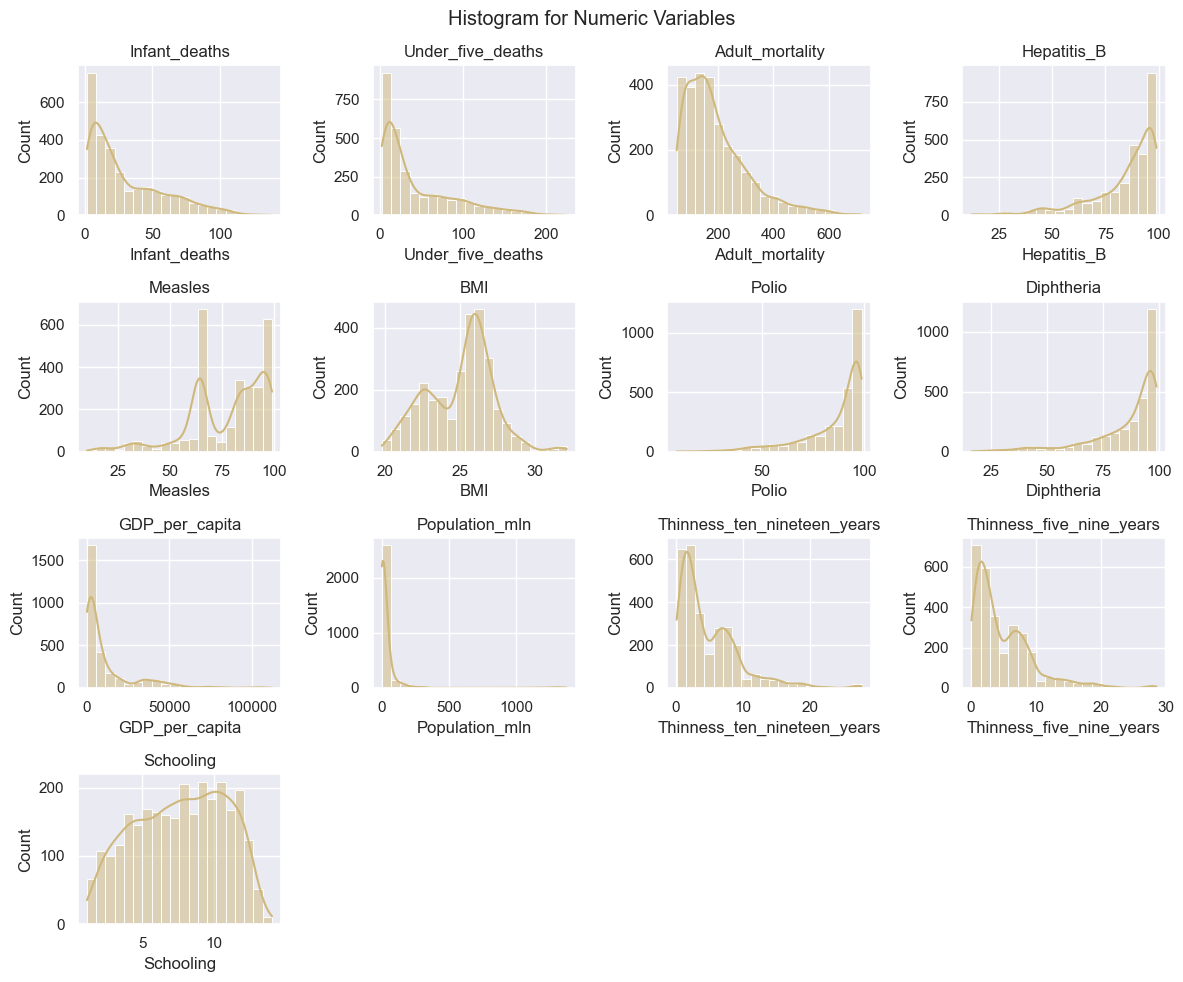

In [136]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

numeric_features = ['Infant_deaths', 'Under_five_deaths', 'Adult_mortality', 'Hepatitis_B', 'Measles', 'BMI', 
                   'Polio', 'Diphtheria', 'GDP_per_capita', 'Population_mln', 'Thinness_ten_nineteen_years', 
                   'Thinness_five_nine_years', 'Schooling']

sns.set(rc={'figure.figsize': (12,10)})

num_variables = len(numeric_features)
num_cols = 4
num_rows = math.ceil(num_variables / num_cols)
for i, column in enumerate(df[numeric_features].columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.histplot(df[column], bins=20, color='#CFB87C', kde=True)
    plt.title(column)
    
plt.suptitle('Histogram for Numeric Variables', ha='center', fontsize='large')
plt.tight_layout()
plt.show()

### Response Variable

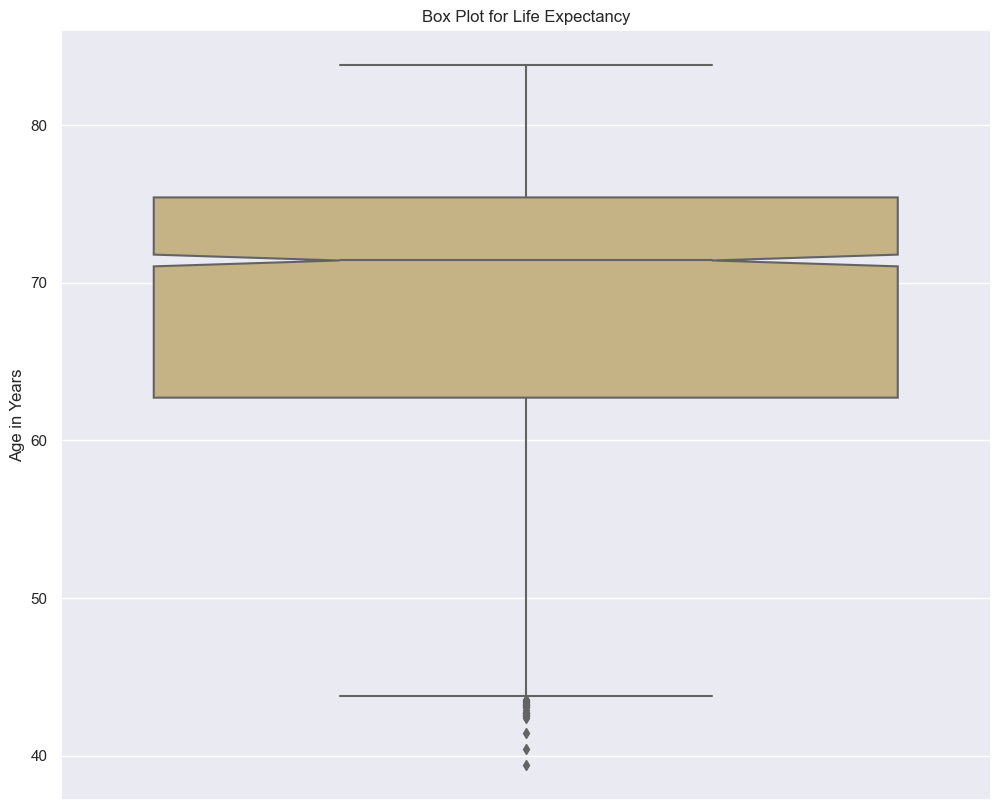

In [137]:
# Box plot for response variable
ax = sns.boxplot(df['Life_expectancy'], color='#CFB87C', notch=True)
ax.set_xticklabels([])
plt.title('Box Plot for Life Expectancy')
plt.ylabel('Age in Years')
plt.show()

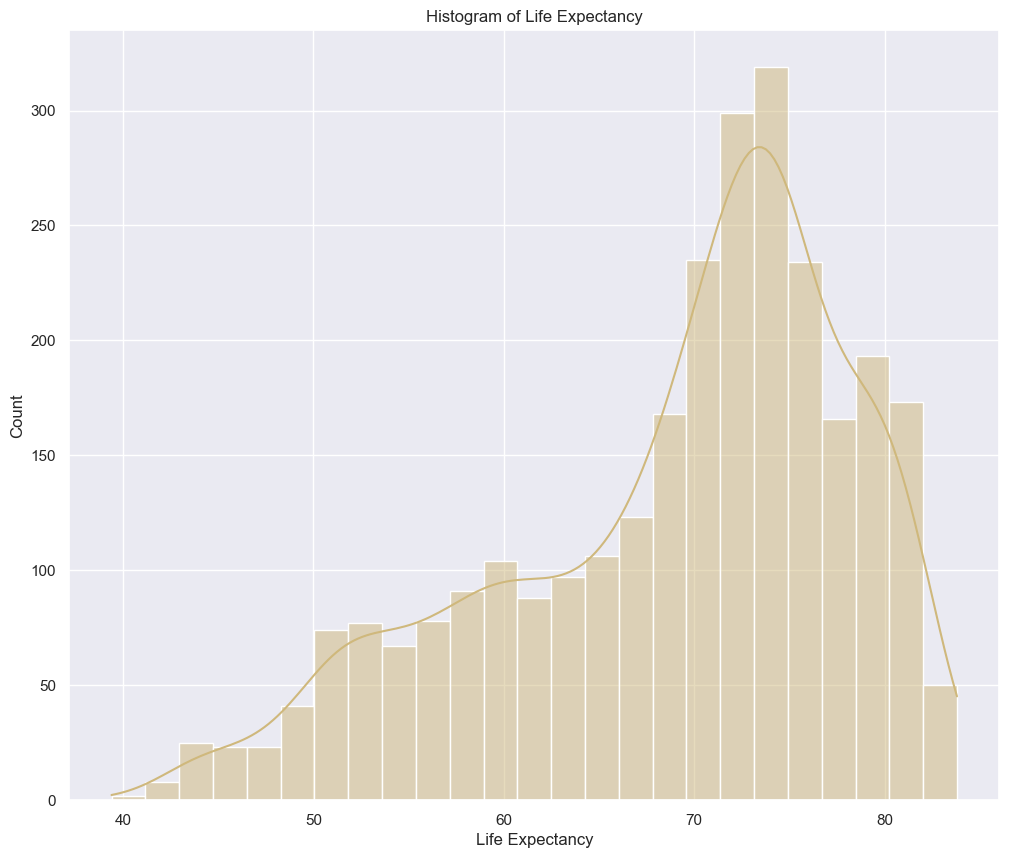

In [138]:
bar_color = '#CFB87C'

sns.histplot(df['Life_expectancy'], color=bar_color, kde=True)
plt.xlabel('Life Expectancy')
plt.title('Histogram of Life Expectancy')
plt.show()

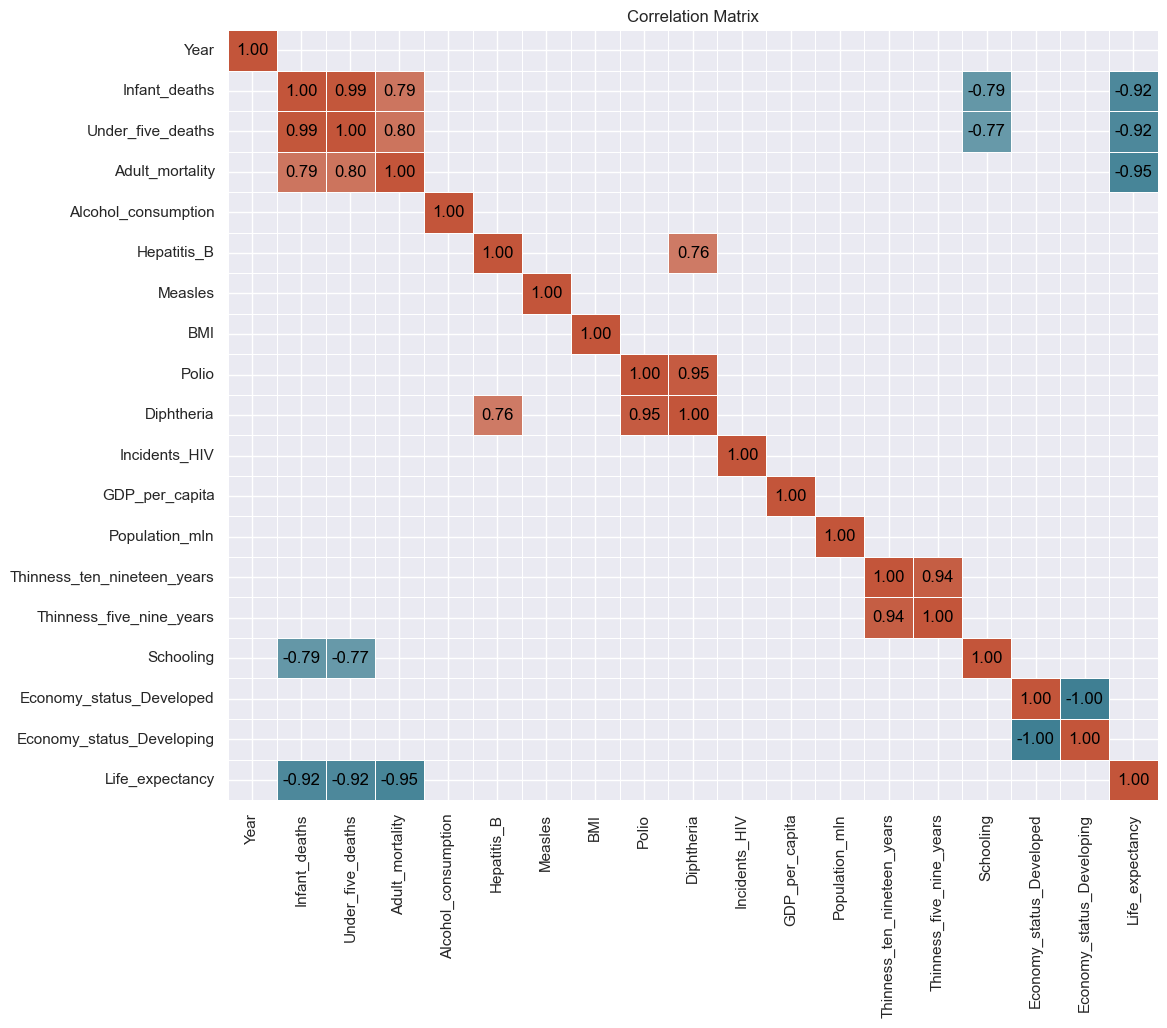

In [139]:
correlation_matrix = df.corr(numeric_only=True)

# Setting threshold for coloring
threshold = 0.75

# Creating a mask for values above the threshold
mask = abs(correlation_matrix) < threshold

# Creating a custom colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Setting the color of the annotations
annot_kws = {'color':'black'}

sns.heatmap(correlation_matrix, annot=True, cmap=cmap, mask=mask, cbar=False, 
            annot_kws=annot_kws, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



Due to some variables being correlated, elastic-net regression will be used to create the model.

In [140]:
# Creating a copy of the original dataset
df_copy = df.copy()

# Dropping features from the dataset
features_to_drop = ['Year']

df = df.drop(columns=features_to_drop)

In [141]:
# Using get_dummies for one-hot encoding
df = pd.get_dummies(df, columns=['Country', 'Region'])

In [142]:
from sklearn.model_selection import train_test_split

# Seperating the features from the target variable
y = df['Life_expectancy']
X = df.drop('Life_expectancy', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=24)

print(f'Number of samples in the training set: {len(X_train)}')
print(f'Number of samples in the testing set: {len(X_test)}')

Number of samples in the training set: 1918
Number of samples in the testing set: 946


In [143]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Elastic-Net Regression

In [144]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

elastic_net = ElasticNet()

param_grid = {
    'alpha': [0.1, 0.5, 1.0],
    'l1_ratio': [0.1, 0.5, 0.9]
}

grid_search = GridSearchCV(elastic_net, param_grid,  cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(f'Best Parameters: {best_params}')

y_pred = best_estimator.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.1}
Mean Squared Error: 0.8977556101595361
R-squared Score: 0.9899769417269327


### Model Diagnostics

In [145]:
d = {'true': y_test, 'predicted': y_pred}
comp_df = pd.DataFrame(data=d)

comp_df['diff'] = comp_df['predicted']-comp_df['true']
comp_df.head()

,true,predicted,diff
1290,72.80,73.38,0.58
2255,51.20,52.96,1.76
835,68.30,69.77,1.47
1865,75.80,75.23,-0.57
781,65.10,66.29,1.19


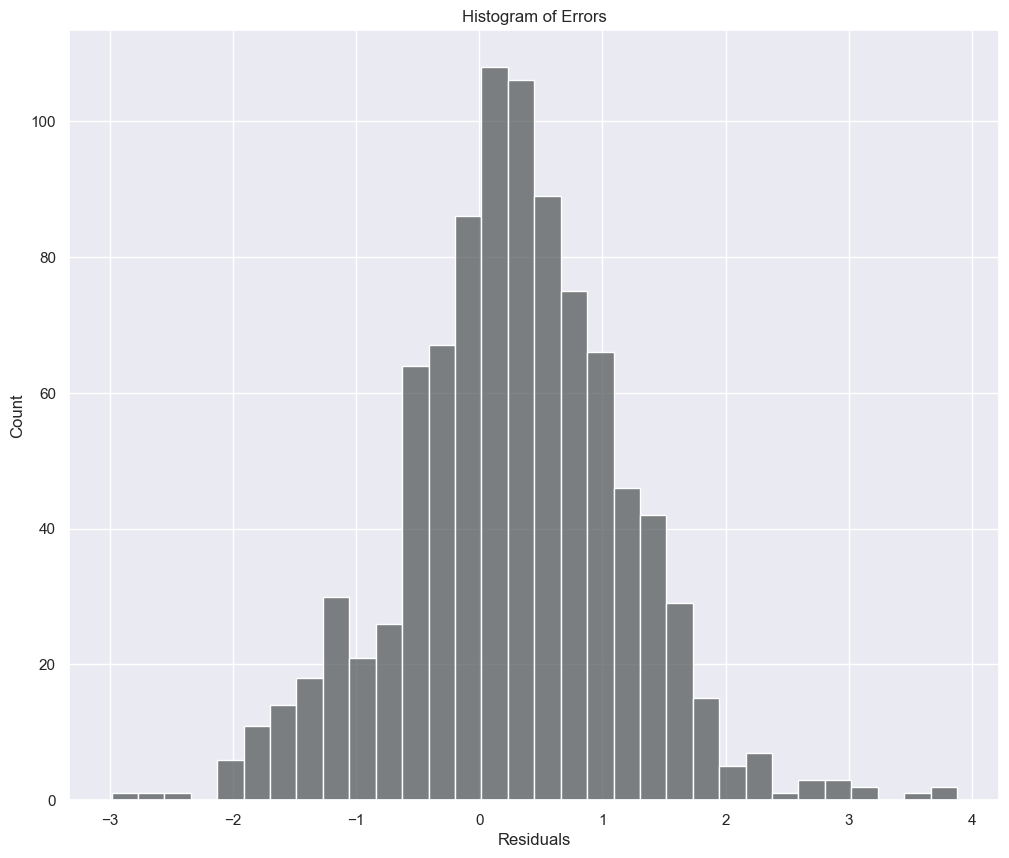

In [146]:
error_color = '#565A5C'

sns.histplot(comp_df['diff'], kde=False, color=error_color)
plt.xlabel('Residuals')
plt.title('Histogram of Errors')
plt.show()

The shape of the curve is roughly bell-shaped; therefore, the residuals have a normal distribution. 

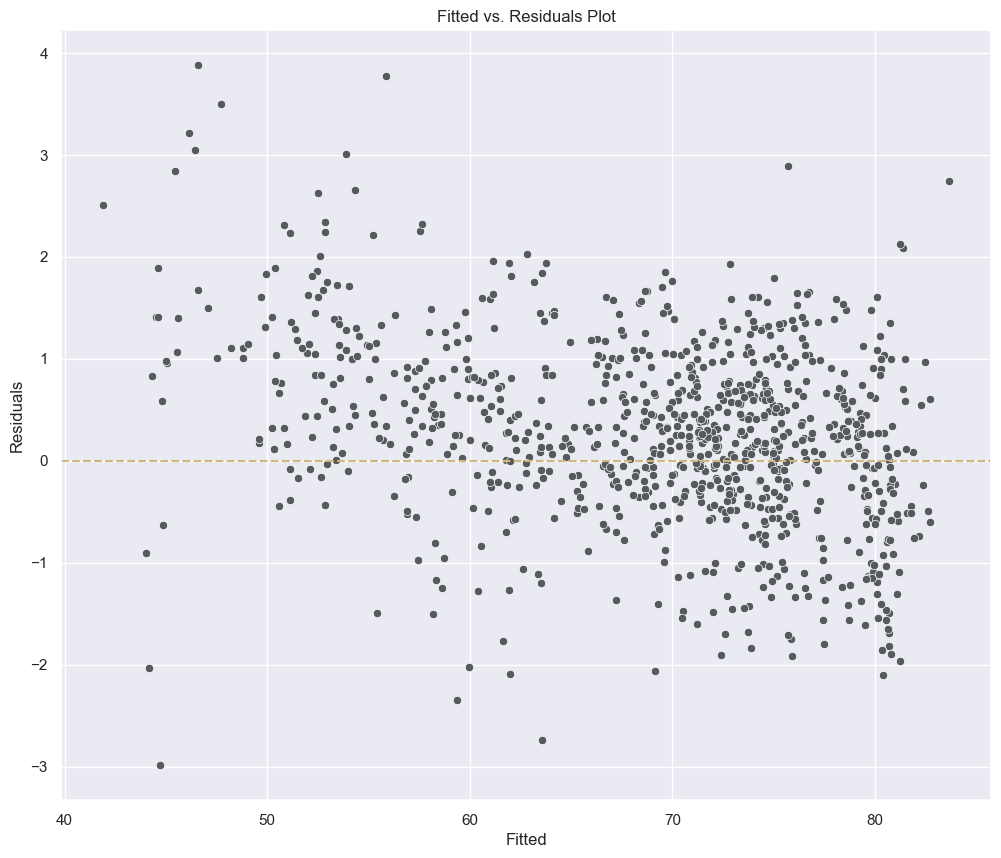

In [147]:
sns.scatterplot(x=comp_df['predicted'], y=comp_df['diff'], color=error_color)
plt.axhline(y=0, color=bar_color, linestyle='--')
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.title('Fitted vs. Residuals Plot')
plt.show()

In [148]:
from statsmodels.stats.diagnostic import het_breuschpagan

residuals = comp_df['diff']

# Breusch-Pagan test for homoscedasticity
_, p_value, _, _ = het_breuschpagan(residuals, X_test_scaled)
print(f'Breusch-Pagan Test p-value: {p_value}')


Breusch-Pagan Test p-value: 2.2321788839945802e-13


Based on the distribution of the data on the scatterplot the variance of the errors appears to be constant (i.e., no homoscedasticity) and the relationship between the dependent and independent variables appears to be linear. To confirm the absence of homoscedasticity, the Breusch-Pagan test was conducted, and its results confirmed the interpretation of the scatterplot. 

# Interpreting the Model

To maximize the use of the model, it is important to identify the influential features. To identify influential features, an arbitrary cutoff of absolute 0.5 was used. 

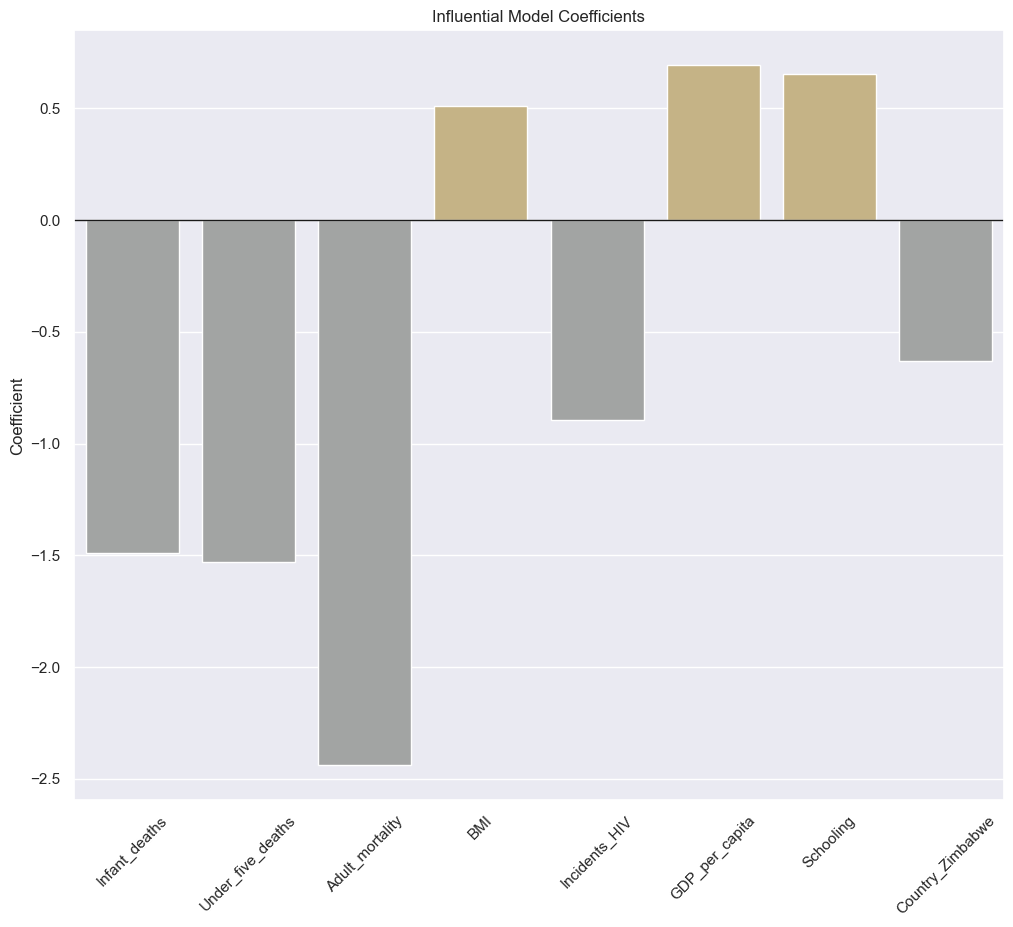

In [149]:
import numpy as np

feature_names = df.columns

threshold = 0.5

abs_coefficients = np.abs(best_estimator.coef_)

above_threshold_mask = abs_coefficients > threshold

selected_coefficients_indices = np.where(above_threshold_mask)[0]

selected_coefficients = best_estimator.coef_[above_threshold_mask]
selected_feature_names = [feature_names[idx] for idx in selected_coefficients_indices]
palette = ['#CFB87C' if val > 0 else '#A2A4A3' for val in selected_coefficients]

sns.barplot(x=selected_feature_names, y=selected_coefficients, palette=palette)
plt.axhline(y=0, color='k', linewidth=1)
plt.xticks(rotation=45)
plt.title('Influential Model Coefficients')
plt.ylabel('Coefficient')
plt.show()

Using a threshold of 0.5, a total of eight variables were classified as influential. All but one (i.e., Country_Zimbabwe) are amenable to change through targeted intervention.

## Application of Model

In [150]:
# Descriptive statistics for influential variables

influential_variables = ['Infant_deaths', 'Under_five_deaths', 'Adult_mortality', 'BMI', 'Incidents_HIV', 
                         'GDP_per_capita', 'Schooling']

df_copy[influential_variables].describe()

,Infant_deaths,Under_five_deaths,Adult_mortality,BMI,Incidents_HIV,GDP_per_capita,Schooling
count,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00
mean,30.36,42.94,192.25,25.03,0.89,11540.92,7.63
std,27.54,44.57,114.91,2.19,2.38,16934.79,3.17
min,1.80,2.30,49.38,19.80,0.01,148.00,1.10
25%,8.10,9.67,106.91,23.20,0.08,1415.75,5.10
50%,19.60,23.10,163.84,25.50,0.15,4217.00,7.80
75%,47.35,66.00,246.79,26.40,0.46,12557.00,10.30
max,138.10,224.90,719.36,32.10,21.68,112418.00,14.10


In [151]:
# Randomly sample one row from the original data frame

pd.set_option('display.max_columns', None)

# Creating a subset of the dataframe containing rows where the life expectancy is less than the mean
condition = df_copy['Life_expectancy'] < df_copy['Life_expectancy'].mean()
subset_df = df_copy[condition]

sampled_row = subset_df.sample(n=1, random_state=24)

sampled_row

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
1980,Guyana,South America,2012,29.40,35.90,213.86,5.72,97,90,26.00,97,97,0.61,5339,0.76,5.60,5.30,8.30,0,1,68.60


In the sampled row of data, the life expectancy for Guyana in 2012 was 68.60. 

The values for the influential variables are listed below. *Note: Data related to the influential variable "Country_Zimbabwe" were omitted because that variable is not ammenanable to change.*
- Infant Deaths: 29.40
- Under Five Deaths: 35.90
- Adult Mortality: 213.86
- BMI: 26.00
- Incidents of HIV: 0.61
- GDP per Capita: 5339
- Schooling: 8.30

In [152]:
# Merging sample row with original dataset
row_merged = pd.concat([df_copy, sampled_row], ignore_index=True)

row_data = row_merged.drop(['Life_expectancy', 'Year'], axis=1)

row_data = pd.get_dummies(row_data, columns=['Country', 'Region'])

row_data_scaled = scaler.transform(row_data)

y_pred_row = best_estimator.predict(row_data_scaled)

print(f"The original prediction for life expectancy was {round(y_pred_row[-1],2)}")

The original prediction for life expectancy was 69.03


### Scenario 1: Decrease in Adult Mortality

In [153]:
scenario_1 = {
    'Country': ['Guyana'],
    'Region': ['South America'],
    'Year': [2012],
    'Infant_deaths': [29.40],
    'Under_five_deaths': [35.90],
    'Adult_mortality': [192.47], # 10% reduction 
    'Alcohol_consumption': [5.72],
    'Hepatitis_B': [97],
    'Measles': [90],
    'BMI': [26.00],
    'Polio': [97.00],
    'Diphtheria': [97.00],
    'Incidents_HIV': [0.61],
    'GDP_per_capita': [5339],
    'Population_mln': [0.76],
    'Thinness_ten_nineteen_years': [5.60],
    'Thinness_five_nine_years': [5.30],
    'Schooling': [8.30], 
    'Economy_status_Developed': [0],
    'Economy_status_Developing': [1]
}

# Convert dictionary to dataframe
scenario_1_df = pd.DataFrame(scenario_1)

# Merge new current data with orginal dataset
merged_df = pd.concat([df_copy, scenario_1_df], ignore_index=True)

# Remove the response variable from the merged dataframe
new_data = merged_df.drop(['Life_expectancy', 'Year'], axis=1)

# One hot encoding region and country features
new_data = pd.get_dummies(new_data, columns=['Country', 'Region'])

# Standardizing the data
new_data_scaled = scaler.transform(new_data)

# Making new prediction
y_pred_new_data = best_estimator.predict(new_data_scaled)

# Extracting the relevant row from the dataframe
print(f"After entering the hypothetical data, the predicted life expectancy is {round(y_pred_new_data[-1], 2)}")

After entering the hypothetical data, the predicted life expectancy is 69.48


### Scenario 2: Increase in Formal Education

In [154]:
scenario_2 = {
    'Country': ['Guyana'],
    'Region': ['South America'],
    'Year': [2012],
    'Infant_deaths': [29.40], 
    'Under_five_deaths': [35.90], 
    'Adult_mortality': [213.86],
    'Alcohol_consumption': [5.72],
    'Hepatitis_B': [97],
    'Measles': [90],
    'BMI': [26.00],
    'Polio': [97.00],
    'Diphtheria': [97.00],
    'Incidents_HIV': [0.61],
    'GDP_per_capita': [5339],
    'Population_mln': [0.76],
    'Thinness_ten_nineteen_years': [5.60],
    'Thinness_five_nine_years': [5.30],
    'Schooling': [9.13], # 10% increase
    'Economy_status_Developed': [0],
    'Economy_status_Developing': [1]
}

# Convert dictionary to dataframe
scenario_2_df = pd.DataFrame(scenario_2)

# Merge new current data with orginal dataset
merged_df = pd.concat([df_copy, scenario_2_df], ignore_index=True)

# Remove the response variable from the merged dataframe
new_data = merged_df.drop(['Life_expectancy', 'Year'], axis=1)

# One hot encoding region and country features
new_data = pd.get_dummies(new_data, columns=['Country', 'Region'])

# Standardizing the data
new_data_scaled = scaler.transform(new_data)

# Making new prediction
y_pred_new_data = best_estimator.predict(new_data_scaled)

# Extracting the relevant row from the dataframe
print(f"After entering the hypothetical data, the predicted life expectancy is {round(y_pred_new_data[-1], 2)}")

After entering the hypothetical data, the predicted life expectancy is 69.2


## Discussion and Conclusion

The purpose of this project was to build a machine learning model that could be used to predict the average life expectancy for a population based on common health variables (e.g., Body Mass Index). Ideally, the model will be utilized by governmental or non-governmental organizations focused on improving stagnating or declining life expectancy.

The model used elastic-net regression to account for correlation between some features. To determine the optimal values for the hyper-parameters $ \alpha $ and $ \rho $, GridSearchCV from the *sklearn* module in Python. The results of the grid search indicated that the optimal value was 0.1 for $ \alpha $ and $ \rho $. The testing mean squared error of the model was 0.90 (rounded) and the r-squared value was 0.99 (rounded). Based on those metrics, the model is able to predict life expectancy with a small amount of error and the features in the model account for about 99% of the variance in life expectancy. 

Although the model is able to predict average life expectancy with a small amount of error, it should be used cautiously as a decision-making tool because it does not account for knock-on effects or an event that causes other events to occur. For example, a targeted intervention designed to reduce alcohol consumption may also reduce incidents of human immunodeficiency virus or HIV by decreasing risk behavior (e.g., sharing syringes or needles).  